In [78]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
comments = pd.read_csv("Youtube04-Eminem.csv")

In [80]:
comments.head()

,COMMENT_ID,CONTENT,CLASS
0,1,+447935454150 lovely girl talk to me xxx﻿,spam
1,2,I always end up coming back to this song<br />﻿,ham
2,3,"my sister just received over 6,500 new <a rel=...",spam
3,4,Cool﻿,ham
4,5,Hello I&#39;am from Palastine﻿,spam


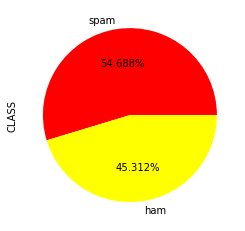

In [81]:
comments.CLASS.value_counts().plot(kind='pie',autopct='%1.3f%%', colors=["red", "yellow", "green"])

In [82]:
features = comments.iloc[:, 1].values
labels = comments.iloc[:, 2].values

In [83]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [84]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v2n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [85]:
processed_features

[' 447935454150 lovely girl talk to me xxx ',
 'i always end up coming back to this song br ',
 'my sister just received over 6 500 new rel nofollow class ot hashtag href https plus google com 23active active youtube views right now the only thing she used was pimpmyviews com ',
 'cool ',
 'hello 39 am from palastine ',
 'wow this video almost has billion views didn 39 know it was so popular ',
 'go check out my rapping video called four wheels please ',
 'almost 1 billion ',
 'aslamu lykum from pakistan ',
 'eminem is idol for very people in españa and mexico or latinoamerica ',
 'help me get 50 subs please ',
 'i love song ',
 'alright ladies if you like this song then check out john rage he 39 a smoking hot rapper coming into the game he 39 not better than eminem lyrically but he 39 hotter hear some of his songs on my channel ',
 'the perfect example of abuse from husbands and the thing is 39 a feminist so definitely agree with this song and well if see this someone 39 going to die 

In [12]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [32]:
from sklearn.naive_bayes import MultinomialNB

text_classifier = MultinomialNB()
text_classifier.fit(X_train, y_train)

MultinomialNB()

In [33]:
predictions = text_classifier.predict(X_test)

In [113]:
X_train.shape

(358, 125)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[35 10]
 [ 3 42]]
              precision    recall  f1-score   support

         ham       0.92      0.78      0.84        45
        spam       0.81      0.93      0.87        45

    accuracy                           0.86        90
   macro avg       0.86      0.86      0.85        90
weighted avg       0.86      0.86      0.85        90

0.8555555555555555


In [66]:
dir(confusion_matrix)

['__annotations__',
 '__call__',
 '__class__',
 '__closure__',
 '__code__',
 '__defaults__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__get__',
 '__getattribute__',
 '__globals__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__kwdefaults__',
 '__le__',
 '__lt__',
 '__module__',
 '__name__',
 '__ne__',
 '__new__',
 '__qualname__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__wrapped__']

In [96]:
features=['********OMG Facebook is OLD! Check out  -----------------&gt; swagFriends com Make thousands of cool new friends everyday! Join the movement!']

In [97]:
processed_features = []

for sentence in range(0, len(test)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [98]:
processed_features

[' omg facebook is old check out gt swagfriends com make thousands of cool new friends everyday join the movement ']

In [99]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\v2n\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:


vectorizer = TfidfVectorizer (max_features=2500, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [125]:
processed_features[0][0]

0.2581988897471611

In [131]:
predictions = text_classifier.predict(processed_features)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 125 is different from 15)